Comparing performance of numpy + openblas with increasing number of threads.  Then doing the same for the Intel Python distribution which uses numpy + mkl + some black magic + openmp

Just doing matrix multiplication here -- $NxN$ where $N = [500,1000,2000]$

In [1]:
!which python

/home/gil/anaconda/bin/python


In [2]:
!python printinfo.py

openblas_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    library_dirs = ['/home/gil/anaconda/lib']
    language = c
blas_opt_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    library_dirs = ['/home/gil/anaconda/lib']
    language = c
lapack_opt_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    library_dirs = ['/home/gil/anaconda/lib']
    language = c
blas_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    library_dirs = ['/home/gil/anaconda/lib']
    language = c


In [3]:
!/home/gil/intelpython/bin/python3 printinfo.py

lapack_mkl_info:
    include_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/include']
    library_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/lib/intel64']
    libraries = ['mkl_rt', 'mkl_rt', 'pthread']
    define_macros = [('SCIPY_MKL_H', None)]
blas_mkl_info:
    include_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/include']
    library_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/lib/intel64']
    libraries = ['mkl_rt', 'pthread']
    define_macros = [('SCIPY_MKL_H', None)]
mkl_info:
    include_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/include']
    library_dirs = ['/nfs/fx/proj/openmp/compilers/intel/15.0/Linux/pkgs/update3/composerxe/mkl/lib/intel64']
    libraries = ['mkl_rt', 'pthread']
    define_macros = [('SCIPY_MKL_H', None)]
openblas_lapack_info:
  NOT AVAILABLE
lapack_opt_info:

In [4]:
import pickle
import numpy

In [5]:
results_openblas = pickle.load(open('results_openblas.pkl','rb'))
results_mkl = pickle.load(open('results_mkl.pkl','rb'))

In [18]:
oblas = numpy.empty(3, dtype=numpy.ndarray)
mkl = numpy.empty(3, dtype=numpy.ndarray)
for x in [0,1,2]:
    oblas[x] = [key for counter in sorted(results_openblas.values()) for key in counter[x:x+1]]
    mkl[x] = [key for counter in sorted(results_mkl.values()) for key in counter[x:x+1]]

In [19]:
from matplotlib import pyplot
%matplotlib inline

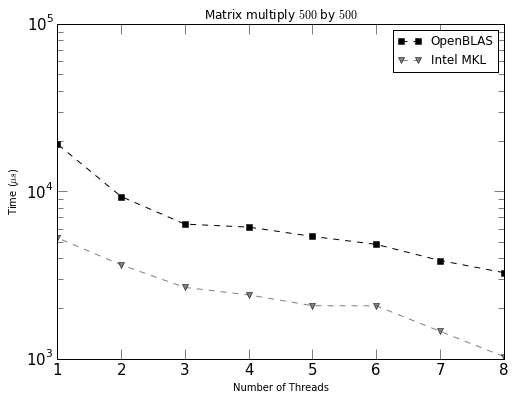

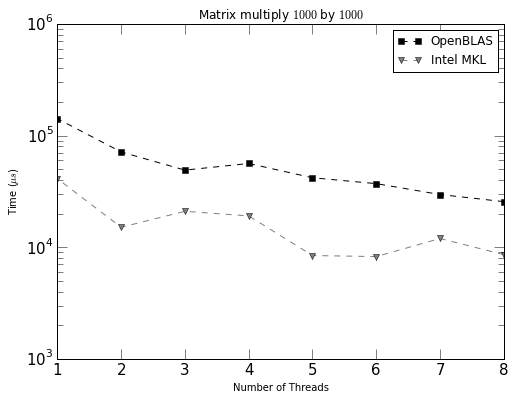

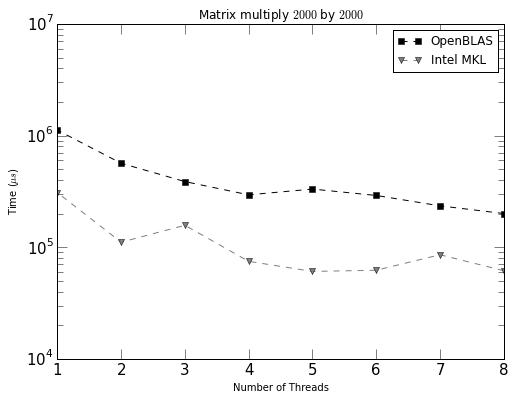

In [79]:
matsizes = [500,1000,2000]

for i, n in enumerate(matsizes):

    fig = pyplot.figure(figsize=(8,6))
    plot = fig.add_subplot(111)
    pyplot.semilogy(numpy.arange(8,0,-1),oblas[i], color='black', linestyle='dashed', marker='s', label='OpenBLAS')
    pyplot.semilogy(numpy.arange(8,0,-1),mkl[i], color='grey', linestyle='dashed', marker='v', label='Intel MKL')
    pyplot.xlabel('Number of Threads')
    pyplot.ylabel('Time ($\mu s$)')
    pyplot.legend()
    pyplot.title('Matrix multiply ${}$ by ${}$'.format(n,n))
    plot.tick_params(length=10, axis='both', which='major', labelsize=15)
    plot.tick_params(length=6, axis='y', which='minor')
